
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [66]:

import numpy as np
import matplotlib.pyplot as plt


In [67]:
np.random.seed(42)

X = np.random.randn(100, 2)          # 100 samples, 2 features
true_w = np.array([3, -2])
y = X @ true_w + 1 + np.random.randn(100) * 0.5


In [68]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [69]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

In [70]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = 0
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b
            error = y_pred - y

            # MSE + L2 loss
            loss = np.mean(error**2) + self.l2_lambda * np.sum(self.w**2)
            self.losses.append(loss)

            # Gradients
            dw = (2/n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2/n_samples) * np.sum(error)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db


    def predict(self, X):
        return X @ self.w + self.b


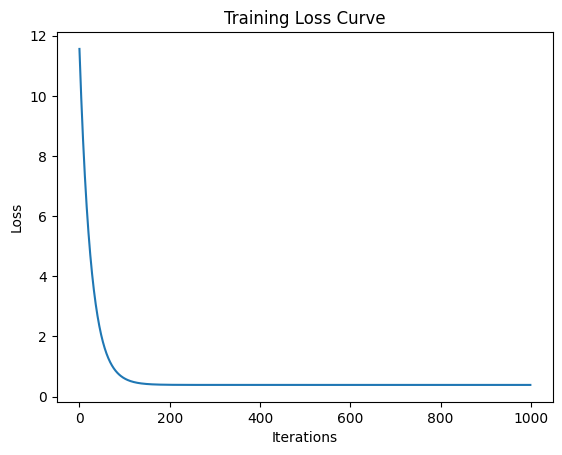

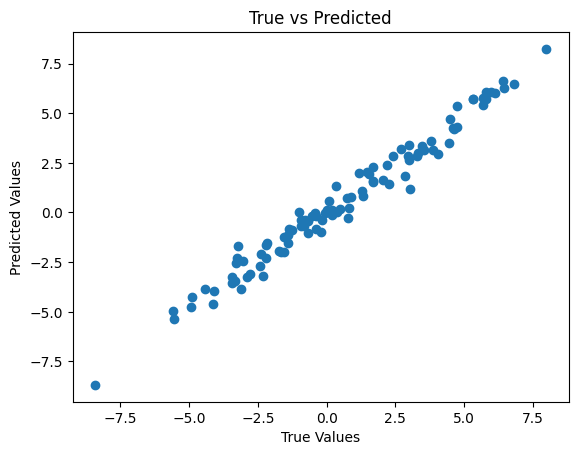

In [71]:
model = LinearRegressionManual(
    lr=0.01,
    epochs=1000,
    l2_lambda=0.01
)

model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [72]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


In [73]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = 0
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        for _ in range(self.epochs):
            linear = X @ self.w + self.b
            y_pred = sigmoid(linear)

            # Binary Cross Entropy + L2
            loss = -np.mean(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * (X.T @ (y_pred - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


Final Accuracy: 0.985


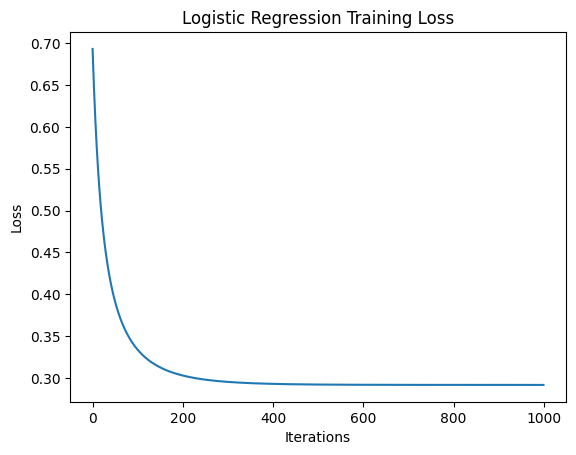

In [74]:
np.random.seed(0)

X = np.random.randn(200, 2)
true_w = np.array([2, -3])
logits = X @ true_w
y = (logits > 0).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.01
)

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logistic Regression Training Loss")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [75]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape

    # Flatten matrix elements
    values = M.flatten()
    positions = [(i, j) for i in range(n) for j in range(m)]

    # Randomly initialize centroids from values
    centroids = np.random.choice(values, k, replace=False)

    for _ in range(max_iters):
        clusters = {i: [] for i in range(k)}

        # Assignment step
        for val, pos in zip(values, positions):
            distances = np.abs(centroids - val)
            cluster_id = np.argmin(distances)
            clusters[cluster_id].append((val, pos))

        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(
                    np.mean([item[0] for item in clusters[i]])
                )
            else:
                new_centroids.append(centroids[i])

        new_centroids = np.array(new_centroids)

        # Convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # assignment table and cookbook
    assignment_table = np.zeros_like(M, dtype=int)
    cookbook = {}

    for cluster_id, items in clusters.items():
        cookbook[cluster_id] = []
        for _, (i, j) in items:
            assignment_table[i, j] = cluster_id
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


In [76]:
np.random.seed(0)
M = np.random.randn(5, 5)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("Matrix M:")
print(M)

print("\nAssignment Table:")
print(assignment_table)

print("\nCentroids:")
print(centroids)

print("\nCookbook:")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")


Matrix M:
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]]

Assignment Table:
[[0 2 2 0 0]
 [1 2 2 2 2]
 [2 0 2 2 2]
 [2 0 2 2 1]
 [1 2 2 1 0]]

Centroids:
[ 1.84843512 -1.28163211  0.39435094]

Cookbook:
Cluster 0: [(0, 0), (0, 3), (0, 4), (2, 1), (3, 1), (4, 4)]
Cluster 1: [(1, 0), (3, 4), (4, 0), (4, 3)]
Cluster 2: [(0, 1), (0, 2), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 2), (2, 3), (2, 4), (3, 0), (3, 2), (3, 3), (4, 1), (4, 2)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
